# Scaling

- Weight       Fuel in Engine

- 1000           2
- 2000           4
- 4000           6
- 6000           8
- 8000          10

As you can see 2 columns carry values that are varying in a totally different range . Column having large values dominates over the formation of a prediction line during model training phase . To mitigate this , it is advisable to bring values in all columns to uniform range without disturbiing the relationship or proportion . This is achieved by scaling .

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x = np.array([8000,8030,9000,8300,10000,8598,9012,8444,9009,9991])
y = np.array([1,2,2,1,3,1,3,2,3,1])

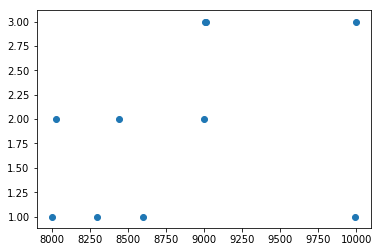

In [4]:
plt.scatter(x,y)
plt.show()


## To calculate slope b/w first two points

In [5]:
(y[1]-y[0])/(x[1]-x[0])

0.03333333333333333

# Min - Max Scaling


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)


In [11]:
scaler = MinMaxScaler(feature_range=(0,1))  #All values brought down in range 0 to 1 from numbers like 1000,8000 etc.
rescaledx = scaler.fit_transform(x)
rescaledx 


C:\Users\ayon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.    ],
       [0.015 ],
       [0.5   ],
       [0.15  ],
       [1.    ],
       [0.299 ],
       [0.506 ],
       [0.222 ],
       [0.5045],
       [0.9955]])

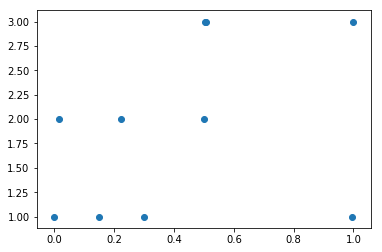

In [12]:
plt.scatter(rescaledx,y)   #Now compare the below normalized plot with the plot above 
plt.show()


## Let\`s see the effect of normalization on the slope

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))  #All values brought down in range 0 to 1 from numbers like 1000,8000 etc.
rescaledx = scaler.fit_transform(x)
rescaledy = scaler.fit_transform(y)

(rescaledy[0]-rescaledy[1])/(rescaledx[0]-rescaledx[1])

C:\Users\ayon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([33.33333333])

# Standardization Scaling

Z Score Normalization

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = x.reshape(-1,1)
rescaledx = scaler.fit_transform(x1)
rescaledx

C:\Users\ayon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.23310114],
       [-1.18897777],
       [ 0.23767789],
       [-0.79186743],
       [ 1.70845692],
       [-0.35357528],
       [ 0.25532724],
       [-0.58007525],
       [ 0.2509149 ],
       [ 1.69521991]])

In [16]:
scaler = StandardScaler().fit(y)
y1 = y.reshape(-1,1)
rescaledy = scaler.transform(y1)
rescaledy

C:\Users\ayon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.08347268],
       [ 0.12038585],
       [ 0.12038585],
       [-1.08347268],
       [ 1.32424438],
       [-1.08347268],
       [ 1.32424438],
       [ 0.12038585],
       [ 1.32424438],
       [-1.08347268]])

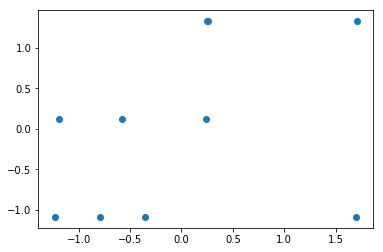

In [17]:
plt.scatter(rescaledx,rescaledy)   #Now compare the below normalized plot with the plot above 
plt.show()

In [18]:
(rescaledy[0]-rescaledy[1])/(rescaledx[0]-rescaledx[1])

array([27.28392022])

# Binarize Data ( Make Binary) 

We transform data by using binary threshold i.e values above the threshold are marked 1 and all equal to or below are marked as 0

In [20]:
from sklearn.preprocessing import Binarizer

In [21]:
binarizer = Binarizer(threshold=0.0)
binaryX = binarizer.fit_transform(rescaledx)
binaryX

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]])

# Application on Real Data

In [23]:
import pandas as pd
import numpy as np
df = pd.read_csv("wine.data",header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic Acid']
df.head()

,Class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
Class label    178 non-null int64
Alcohol        178 non-null float64
Malic Acid     178 non-null float64
dtypes: float64(2), int64(1)
memory usage: 4.2 KB


In [25]:
df["Class label"].unique()

array([1, 2, 3], dtype=int64)

## Apply Standardization

In [38]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(df[['Alcohol','Malic Acid']])
df_std = std_scale.transform(df[['Alcohol','Malic Acid']])


## Min Max Scaler

In [33]:
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol','Malic Acid']])
df_minmax = minmax_scale.transform(df[['Alcohol','Malic Acid']])
df_minmax 


array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265],
       [0.83421053, 0.20158103],
       [0.88421053, 0.22332016],
       [0.79736842, 0.27865613],
       [1.        , 0.17786561],
       [0.74473684, 0.12055336],
       [0.80789474, 0.28063241],
       [0.81315789, 0.14624506],
       [0.71578947, 0.19565217],
       [0.97894737, 0.19565217],
       [0.88157895, 0.22332016],
       [0.68421053, 0.21146245],
       [0.86052632, 0.23320158],
       [0.73684211, 0.16403162],
       [0.83157895, 0.16798419],
       [0.68684211, 0.46640316],
       [0.79736842, 0.17588933],
       [0.5       , 0.60474308],
       [0.70526316, 0.22134387],
       [0.47894737, 0.16996047],
       [0.65      , 0.21146245],
       [0.53157895, 0.25889328],
       [0.62105263, 0.20355731],
       [0.59736842, 0.19367589],
       [0.74736842, 0.22924901],
       [0.78684211, 0.18577075],
       [0.